<a href="https://colab.research.google.com/github/CrisGiacomazzi/Burn_Project/blob/main/Churn_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Churn Project**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
churn_dataset = pd.read_csv('/content/Churn_Modelling.csv')

In [59]:
churn_dataset.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [60]:
# Dropping the surname to anonymize the dataset
churn_dataset.drop('Surname', axis=1).head()

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [61]:
churn_dataset.drop('Surname', axis=1).tail()

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [62]:
churn_dataset.duplicated().sum()

0

In [63]:
churn_dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [64]:
# Exploring data
churn_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


#**EDA Exploratory Data Anaysis**

Text(0.5, 1.0, 'Proportion of Churn')

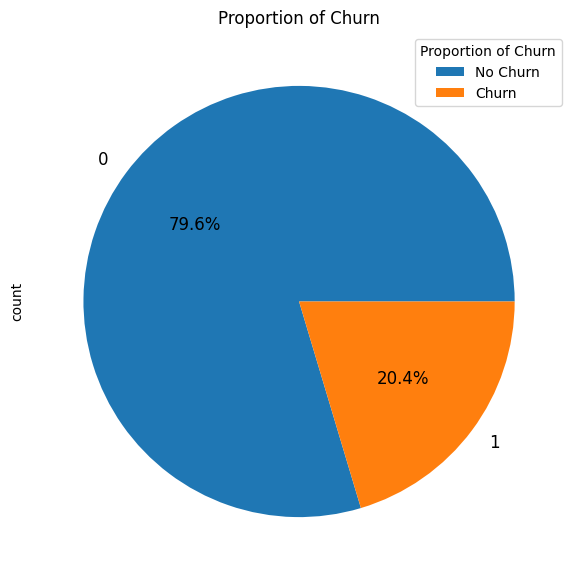

In [65]:
# Proportion of Churn
churn_dataset.Exited.value_counts().plot.pie(autopct='%1.1f%%', figsize=(7, 7), fontsize = 12)
blue = '#4c72b0'
orange = '#ff9f40'
colors = [blue, orange]
plt.legend(labels=['No Churn', 'Churn'], title="Proportion of Churn")
plt.title("Proportion of Churn")

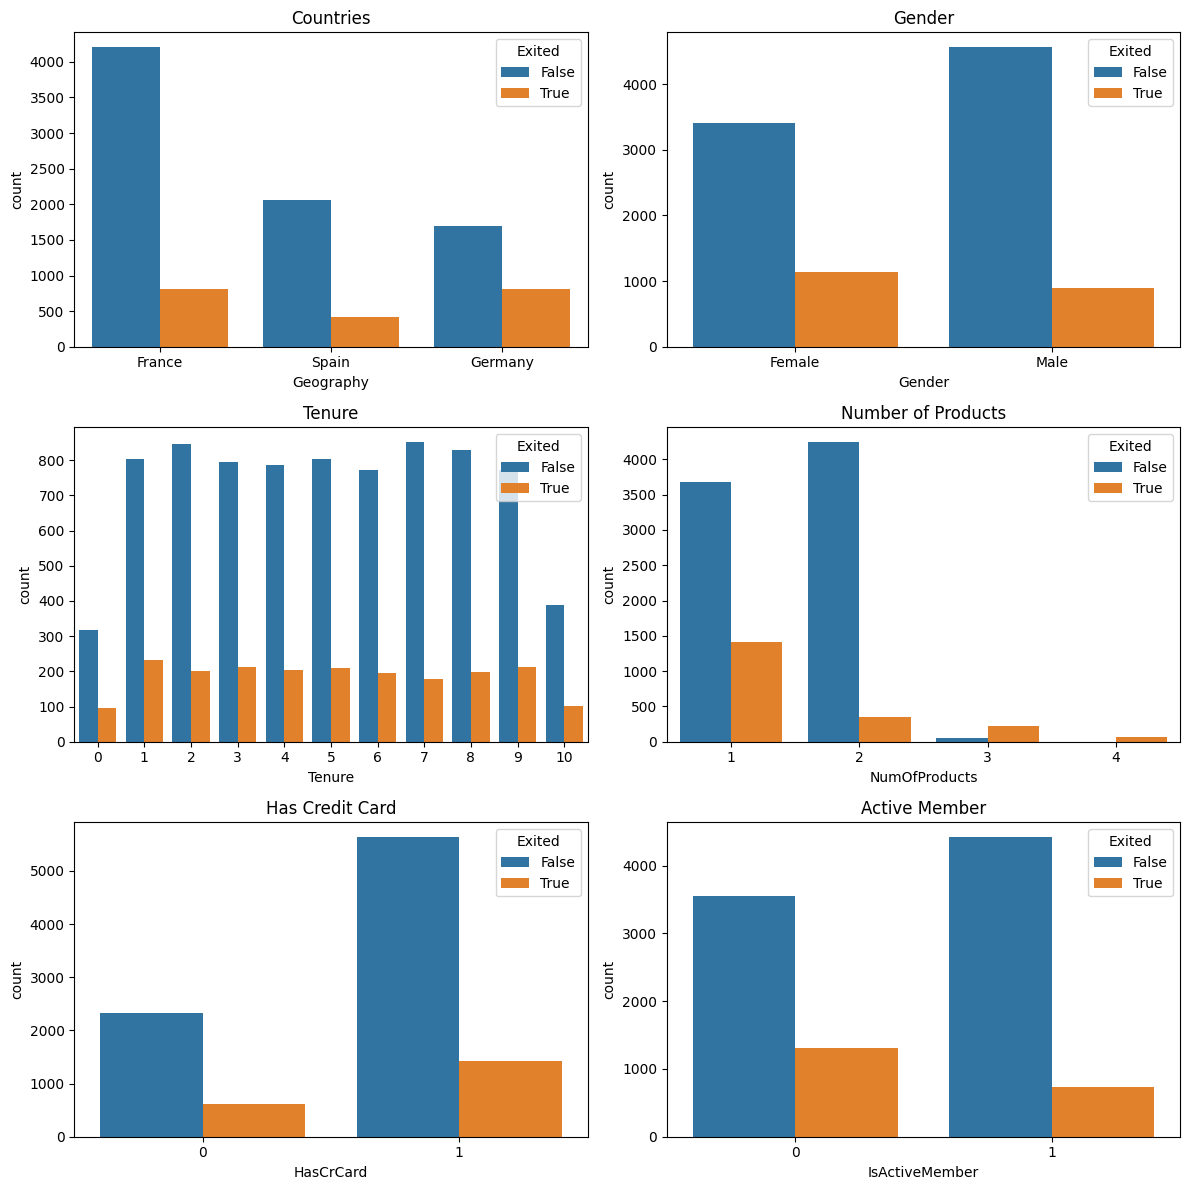

In [57]:
# Categorical variables
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(12, 12))

sns.countplot(x='Geography', hue='Exited', data=df, linewidth=0, ax=ax1).set_title('Countries')
sns.countplot(x='Gender', hue='Exited', data=df, linewidth=0, ax=ax2).set_title('Gender')
sns.countplot(x='Tenure', hue='Exited', data=df, linewidth=0, ax=ax3).set_title('Tenure')
sns.countplot(x='NumOfProducts', hue='Exited', data=df, linewidth=0, ax=ax4).set_title('Number of Products')
sns.countplot(x='HasCrCard', hue='Exited', data=df, linewidth=0, ax=ax5).set_title('Has Credit Card')
sns.countplot(x='IsActiveMember', hue='Exited', data=df, linewidth=0, ax=ax6).set_title('Active Member')

plt.tight_layout()
plt.show()


In [66]:
# More details about Tenure
Tenure_churn = churn_dataset[['Tenure', 'Exited']]
Tenure_churn_frequency = Tenure_churn.groupby('Tenure')['Exited'].value_counts(normalize=True, dropna=False)*100
Tenure_churn_frequency = Tenure_churn_frequency.sort_values(ascending=False)
Tenure_churn_frequency

,,proportion
Tenure,Exited,
7,0,82.782101
2,0,80.820611
8,0,80.780488
6,0,79.731127
4,0,79.474216
10,0,79.387755
5,0,79.347826
3,0,78.889990
9,0,78.353659


In [67]:
# See in detail about the French people
france_churn = churn_dataset[churn_dataset['Geography'] == 'France']
france_churn_frequency = france_churn['Exited'].value_counts(normalize = True, dropna = False)*100
france_churn_frequency

,proportion
Exited,
0,83.845233
1,16.154767


In [68]:
# See in detail about the German people
germany_churn = churn_dataset[churn_dataset['Geography'] == 'Germany']
germany_churn_frequency = germany_churn['Exited'].value_counts(normalize = True, dropna = False)*100
germany_churn_frequency

,proportion
Exited,
0,67.556796
1,32.443204


In [69]:
# See in detail about the Spanish people
spain_churn = churn_dataset[churn_dataset['Geography'] == 'Spain']
spain_churn_frequency = spain_churn['Exited'].value_counts(normalize = True, dropna = False)*100
spain_churn_frequency

,proportion
Exited,
0,83.326605
1,16.673395


In [70]:
# See in detail about the Females
female_churn = churn_dataset[churn_dataset['Gender'] == 'Female']
female_churn_frequency = female_churn['Exited'].value_counts(normalize = True, dropna = False)*100
female_churn_frequency

,proportion
Exited,
0,74.928461
1,25.071539


In [71]:
# See in detail about the Males
Male_churn = churn_dataset[churn_dataset['Gender'] == 'Male']
Male_churn_frequency = Male_churn['Exited'].value_counts(normalize = True, dropna = False)*100
Male_churn_frequency

,proportion
Exited,
0,83.544072
1,16.455928


In [72]:
# See in detail about the Number of Products
NumOfProduct_churn = churn_dataset[['NumOfProducts', 'Exited']]
NumOfProduct_churn_frequency = NumOfProduct_churn.groupby('NumOfProducts')['Exited'].value_counts(normalize=True, dropna=False)*100
NumOfProduct_churn_frequency

NumOfProducts  Exited
1              0          72.285602
               1          27.714398
2              0          92.418301
               1           7.581699
3              1          82.706767
               0          17.293233
4              1         100.000000
Name: proportion, dtype: float64

In [73]:
# See in detalis the frequency of the Clients who has Credit Card
creditcard_churn = churn_dataset[['HasCrCard', 'Exited']]
creditcard_churn_frequency = creditcard_churn.groupby('HasCrCard')['Exited'].value_counts(normalize=True, dropna=False)*100
creditcard_churn_frequency

HasCrCard  Exited
0          0         79.185059
           1         20.814941
1          0         79.815734
           1         20.184266
Name: proportion, dtype: float64

In [74]:
# See in detalis the frequency of the Active members variable
IsActiveMember_churn = churn_dataset[['IsActiveMember','Exited']]
IsActiveMember_churn_frequency = IsActiveMember_churn.groupby('IsActiveMember')['Exited'].value_counts(normalize=True, dropna=False)*100
IsActiveMember_churn_frequency

IsActiveMember  Exited
0               0         73.149103
                1         26.850897
1               0         85.730926
                1         14.269074
Name: proportion, dtype: float64

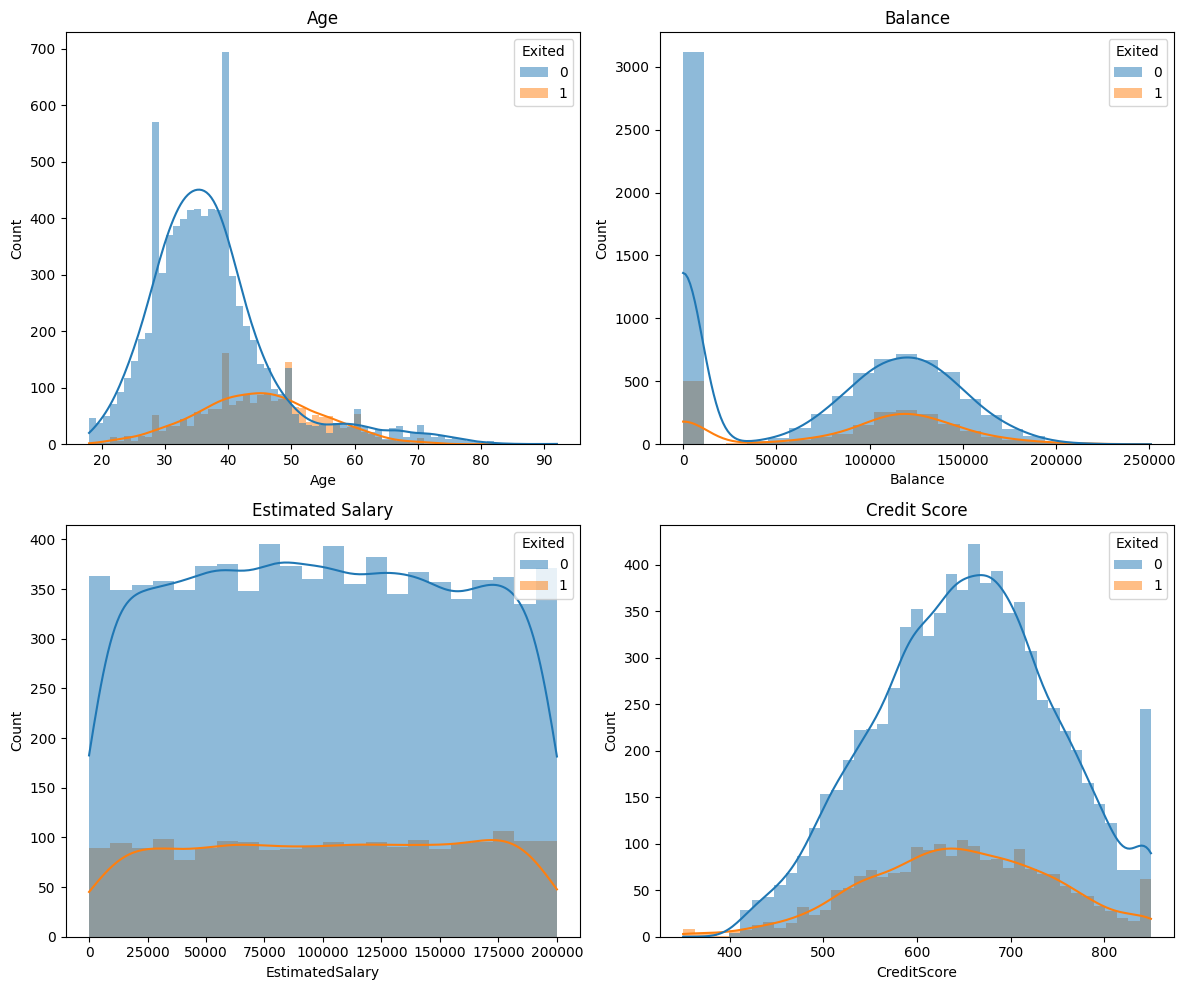

In [75]:
# Numerical Variables - distribution
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

sns.histplot(data=churn_dataset, x='Age', hue='Exited', kde=True, linewidth=0, ax=ax[0, 0]).set_title('Age')
sns.histplot(data=churn_dataset, x='Balance', hue='Exited', kde=True, linewidth=0, ax=ax[0, 1]).set_title('Balance')
sns.histplot(data=churn_dataset, x='EstimatedSalary', hue='Exited', kde=True, linewidth=0, ax=ax[1, 0]).set_title('Estimated Salary')
sns.histplot(data=churn_dataset, x='CreditScore', hue='Exited', kde=True, linewidth=0, ax=ax[1, 1]).set_title('Credit Score')


plt.tight_layout()
plt.show()

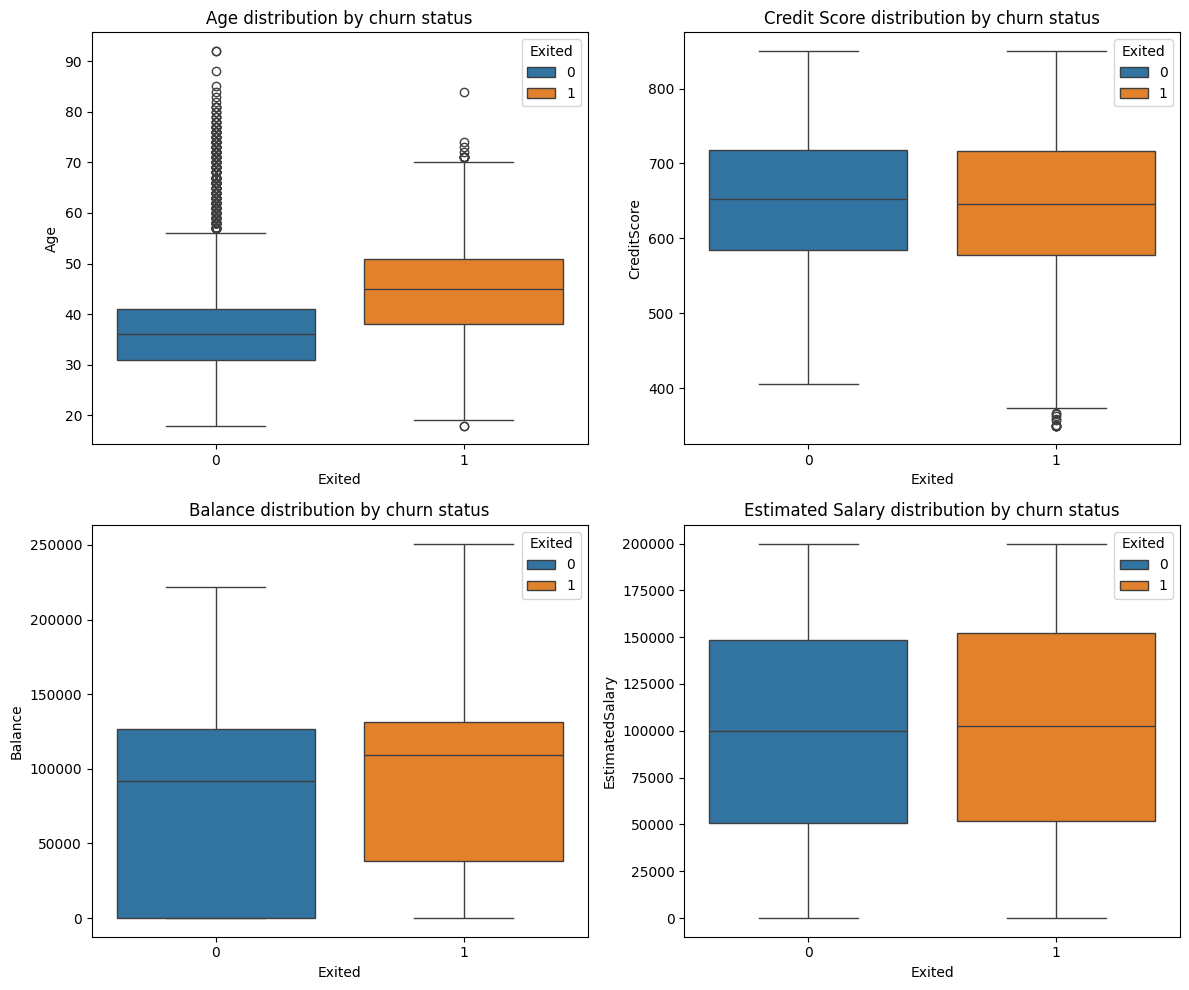

In [25]:
# Boxplot
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

sns.boxplot(x='Exited', y='Age', hue='Exited', data=df, ax=ax[0][0])
ax[0][0].set_title('Age distribution by churn status')
sns.boxplot(x='Exited', y='CreditScore', hue='Exited', data=df, ax=ax[0][1])
ax[0][1].set_title('Credit Score distribution by churn status')
sns.boxplot(x='Exited', y='Balance', hue='Exited', data=df, ax=ax[1][0])
ax[1][0].set_title('Balance distribution by churn status')
sns.boxplot(x='Exited', y='EstimatedSalary', hue='Exited', data=df, ax=ax[1][1])
ax[1][1].set_title('Estimated Salary distribution by churn status')

plt.tight_layout()
plt.show()

#**Cleaning Step**

In [26]:
# More details about the Age of Churn group

In [82]:
def remove_outliers(churn_dataset, columns):
    for variable in columns:
        Q1 = churn_dataset[variable].quantile(0.25)
        Q3 = churn_dataset[variable].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        churn_woutlier_dataset = churn_dataset[(churn_dataset[variable] >= lower_bound) & (churn_dataset[variable] <= upper_bound)]
        return churn_woutlier_dataset

columns_to_clean = ['Age']

In [86]:
churn_dataset_clean = remove_outliers(churn_dataset, columns_to_clean)

In [87]:
# Checking the variable whitout outliers
churn_dataset_clean.Age.describe()

,Age
count,9641.000000
mean,37.791723
std,8.803124
min,18.000000
25%,32.000000
50%,37.000000
75%,43.000000
max,62.000000


In [88]:
churn_dataset_clean.describe().drop(columns=['RowNumber', 'CustomerId'])

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,9641.000000,9641.000000,9641.000000,9641.000000,9641.000000,9641.000000,9641.000000,9641.000000,9641.000000
mean,650.287626,37.791723,5.015351,76560.672538,1.530962,0.705217,0.503164,100172.421223,0.203713
std,96.691920,8.803124,2.888878,62401.698405,0.581617,0.455969,0.500016,57512.265414,0.402779
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,583.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51113.140000,0.000000
50%,652.000000,37.000000,5.000000,97318.250000,1.000000,1.000000,1.000000,100324.010000,0.000000
75%,717.000000,43.000000,7.000000,127660.460000,2.000000,1.000000,1.000000,149458.730000,0.000000
max,850.000000,62.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [89]:
# Analyzing deeper some variables

Credit Score variable

In [90]:
kurtosis_creditscore_churned = churn_dataset_clean[churn_dataset_clean['Exited'] == 1]['CreditScore'].kurtosis()
kurtosis_creditscore_churned

-0.27615213536028405

In [91]:
skew_creditscore_churned = churn_dataset_clean[churn_dataset_clean['Exited'] == 1]['CreditScore'].skew()
skew_creditscore_churned

-0.14931823832779795

In [92]:
median_creditscore_churned = churn_dataset_clean[churn_dataset_clean['Exited'] == 1]['CreditScore'].median()
median_creditscore_churned

646.0

In [93]:
median_creditscore_NOchurned = churn_dataset_clean[churn_dataset_clean['Exited'] == 0]['CreditScore'].median()
median_creditscore_NOchurned

653.0

Age variable

In [94]:
median_age_churned = churn_dataset_clean[churn_dataset_clean['Exited'] == 1]['Age'].median()
median_age_churned

44.0

In [95]:
median_age_NOchurned = churn_dataset_clean[churn_dataset_clean['Exited'] == 0]['Age'].median()
median_age_NOchurned

36.0

Balance

In [96]:
median_balance_churned = churn_dataset_clean[churn_dataset_clean['Exited'] == 1]['Balance'].median()
median_balance_churned

109163.42000000001

In [97]:
median_balance_Nochurned = churn_dataset_clean[churn_dataset_clean['Exited'] == 0]['Balance'].median()
median_balance_Nochurned

92224.56

Estimated Salary

In [98]:
median_es_churned = churn_dataset_clean[churn_dataset_clean['Exited'] == 1]['EstimatedSalary'].median()
median_es_churned

102127.295

In [99]:
median_es_Nochurned = churn_dataset_clean[churn_dataset_clean['Exited'] == 0]['EstimatedSalary'].median()
median_es_Nochurned

99800.87

#Diagnostic Analysis
Correlation

In [103]:
churn_correlation= churn_dataset_clean[['Age', 'Balance', 'EstimatedSalary', 'CreditScore']]

In [105]:
correlation = churn_correlation.corr()
correlation

,Age,Balance,EstimatedSalary,CreditScore
Age,1.000000,0.041216,-0.004559,-0.015989
Balance,0.041216,1.000000,0.010537,0.006396
EstimatedSalary,-0.004559,0.010537,1.000000,-0.000493
CreditScore,-0.015989,0.006396,-0.000493,1.000000


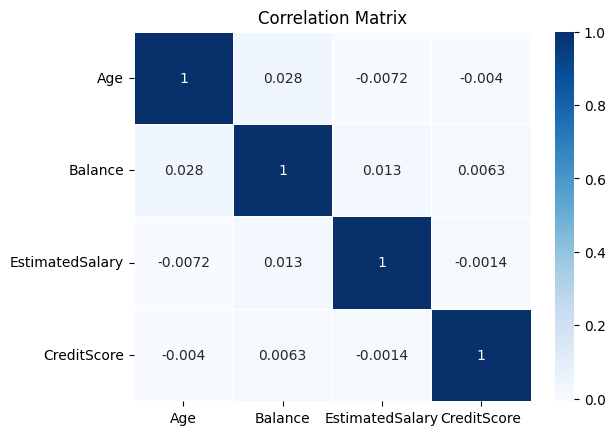

In [104]:
# Showing the correlation in a heatmap
# In general
sns.heatmap(correlation, annot=True, cmap='Blues', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [106]:
churn_dataset['Exited'] = churn_dataset['Exited'].astype(bool)
print(churn_dataset['Exited'].dtype)

bool


In [108]:
# Correlation just in the churn group
churn_exited_correlation = churn_dataset[churn_dataset['Exited'] == True]
churn_exited_correlation = ['Age', 'Balance', 'EstimatedSalary', 'CreditScore']
correlation_matrix = df_exited[df_correlation].corr()
print(correlation_matrix)

                      Age   Balance  EstimatedSalary  CreditScore
Age              1.000000 -0.022527        -0.001083    -0.011033
Balance         -0.022527  1.000000        -0.012540     0.017386
EstimatedSalary -0.001083 -0.012540         1.000000    -0.055129
CreditScore     -0.011033  0.017386        -0.055129     1.000000


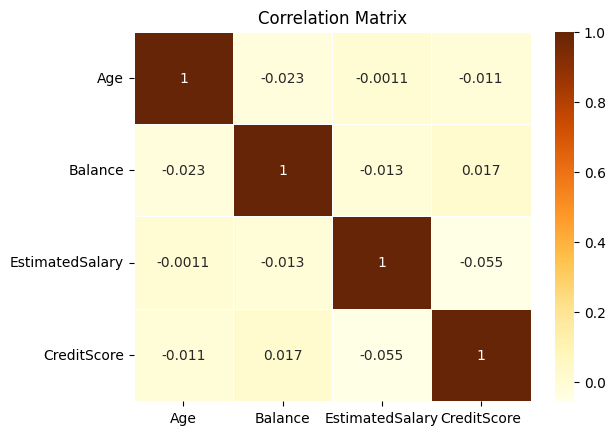

In [109]:
sns.heatmap(correlation_matrix, annot=True, cmap='YlOrBr', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

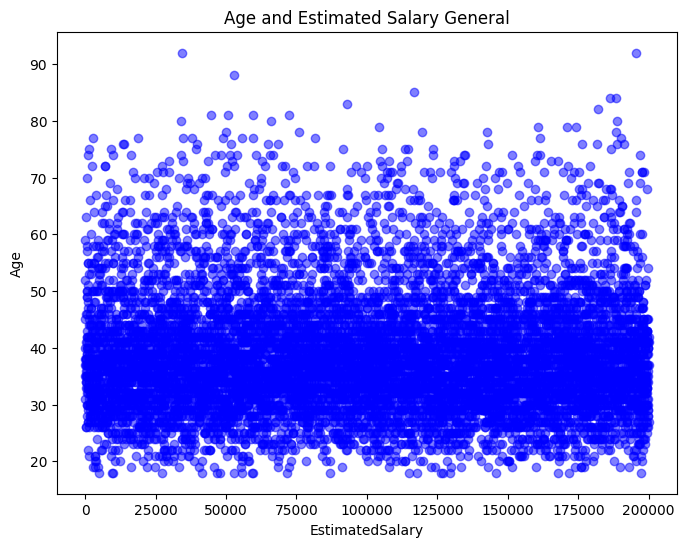

In [110]:
# Correlation - Scatter plot between Age (eixo x) e Balance (eixo y)
plt.figure(figsize=(8, 6))
plt.scatter(churn_dataset['EstimatedSalary'], churn_dataset['Age'], color='blue', alpha=0.5)

plt.title('Age and Estimated Salary General')
plt.xlabel('EstimatedSalary')
plt.ylabel('Age')

plt.show()

In [112]:
churn_dataset_exited= churn_dataset[churn_dataset['Exited'] == True]

Text(0, 0.5, 'Estimated Salary')

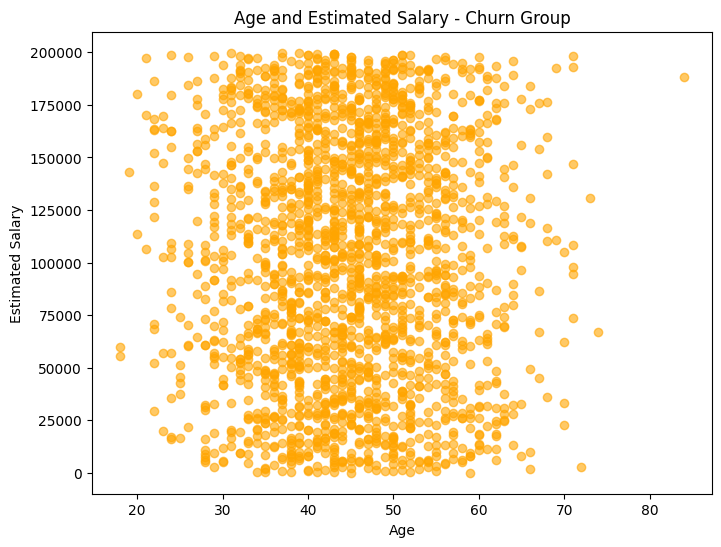

In [113]:
plt.figure(figsize=(8, 6))
plt.scatter(churn_dataset_exited['Age'], churn_dataset_exited['EstimatedSalary'], color='orange', alpha=0.6)
plt.title('Age and Estimated Salary - Churn Group')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')